In [1]:
# import libraries

import math
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import seaborn as sns


In [2]:
titanic = pd.read_csv('titanic_train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### It is to be noted that the columns Age and Cabin have missing values complete and therefore we have to find a way to tackle that

<AxesSubplot:>

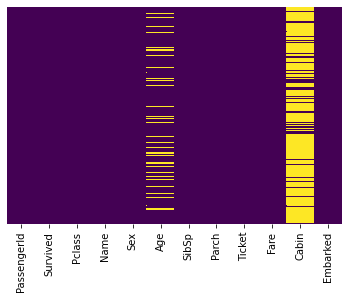

In [4]:
"""This heatmap shows us the gravity of missing values(null rows) for each column 
   the titanic.isnull() function selects all the null values in our column """

sns.heatmap(titanic.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [5]:
"""Here we want to get the percentage of null values for our column Age and Cabin,
   to do this we take the sum of their null values then divide by the column length
   and multiply by 100, null values contained in Cabin is too high(above 50 oercent) so we will proceed to drop it"""

print("Null values for Age Column:",((titanic['Age'].isnull().sum())/len(titanic) * 100).round(1))

print("Null values for Cabin column:",((titanic['Cabin'].isnull().sum())/len(titanic) * 100).round(1))

Null values for Age Column: 19.9
Null values for Cabin column: 77.1


In [6]:
"""Here is another way of checking the percentage of null values for your columns,
   we assign tita to a function titanic.columns that holds all our columns
   then we proceed to loop through each column and calculate its respective null value percentage"""

tita = titanic.columns
tita

for i in tita:
    x = ((titanic[i].isnull().sum())/len(titanic) * 100).round(1)
    print(i, '=', x)

PassengerId = 0.0
Survived = 0.0
Pclass = 0.0
Name = 0.0
Sex = 0.0
Age = 19.9
SibSp = 0.0
Parch = 0.0
Ticket = 0.0
Fare = 0.0
Cabin = 77.1
Embarked = 0.2


<AxesSubplot:xlabel='Survived', ylabel='count'>

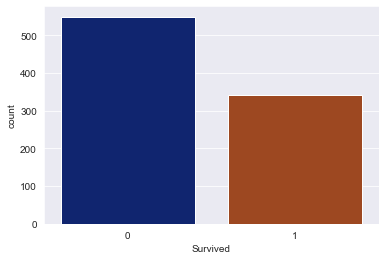

In [7]:
"""This is a simple countplot that shows the amount of people that survived and did not"""

sns.set_style('darkgrid')

sns.countplot(x = 'Survived', data = titanic, palette = 'dark')

<AxesSubplot:xlabel='Survived', ylabel='count'>

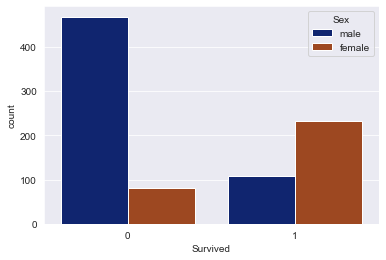

In [8]:
"""This countplot will show us how many people survived in each sex(male or female)"""

sns.set_style('darkgrid')

sns.countplot(x = 'Survived', hue = 'Sex', data = titanic, palette = 'dark')

<AxesSubplot:xlabel='Survived', ylabel='count'>

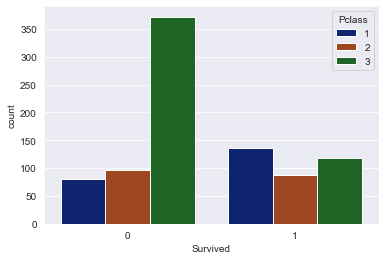

In [9]:
"""In this plot we are getting an idea of how many people survived or did not,
   depending on the Pclass column(which is the wealth class)"""

sns.set_style('darkgrid')

sns.countplot(x = 'Survived', hue = 'Pclass', data = titanic, palette = 'dark')

In [10]:
"""Now we want to take care of the null values in our Age column,
   but first we want to know the mean age of the passengers based on the
   Pclass, using the Pclass provides a better and more accurate way of filling up the age
   then fill the empty rows with the mean age"""

null_age = titanic.groupby(['Pclass']).mean()
null_age

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687
2,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183
3,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550


C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

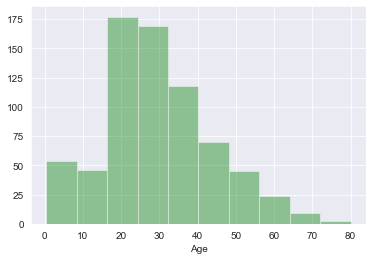

In [11]:
"""distribution plot is used to check the distribution of numerical data
   as opposed to countplot which checks for categorical data,
   the plot shows us the distribution of passengers based on age"""

sns.distplot(titanic['Age'].dropna(), kde = False, color = 'green', bins=10)

<AxesSubplot:>

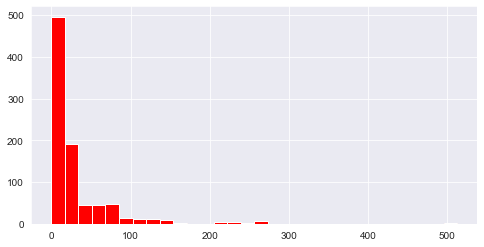

In [12]:
titanic['Fare'].hist(color = 'red', bins=30, figsize = (8,4))

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

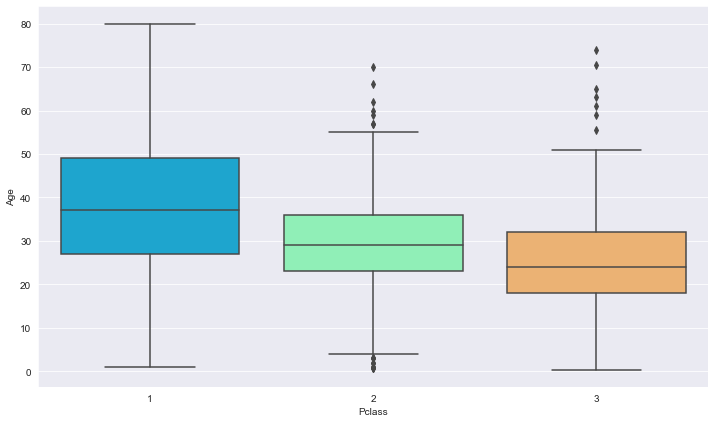

In [13]:
"""Here we are introducing boxplot which we will use to identify our outliers,
   which are represnted by the dots, the boxes are the 50th percentile
   of the age in each Pclass(1, 2, 3)"""

plt.figure(figsize = (12,7))

sns.boxplot(x = 'Pclass', y = 'Age', data = titanic, palette = 'rainbow')

In [14]:
"""As I previously said, we want to know the mean ages as it will help us in dealing with the null values"""

titanic.groupby(['Pclass'])['Age'].mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [15]:
"""the following function fills up the null values of the Age column with the mean age of the Pclass column
   """

def fill_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 38
        elif Pclass == 2:
            return 29
        else: 
            return 25
    else:
        return Age

In [16]:
"""Here we will apply the function to the Age column"""

titanic['Age'] = titanic[['Age', 'Pclass']].apply(fill_age, axis = 1)

##### Now we only have Cabin and Embarked left

<AxesSubplot:>

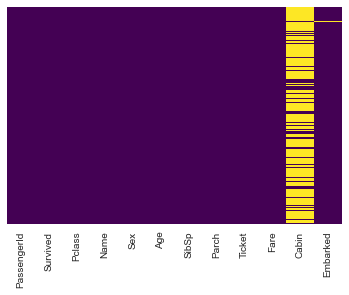

In [17]:
sns.heatmap(titanic.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [18]:
"""We are dropping the Cabin feature here as it has too many null values"""

titanic.drop('Cabin', axis = 1, inplace = True)

In [19]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [20]:
"""We check how many null values are in Embarked
   to give us an insight on how to take care of them"""

titanic['Embarked'].isnull().sum()

2

In [21]:
"""Only two null values are in Embarked so to take care of this we want to check which Value occurs most
   whether its S, C or Q"""

titanic['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [22]:
"""As we can see S occurs the most, therefore we are filling our 2 null rows with S"""

titanic['Embarked'] = titanic['Embarked'].fillna('S')

<AxesSubplot:>

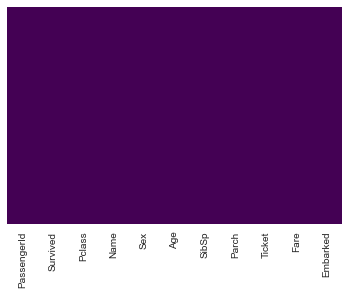

In [23]:
sns.heatmap(titanic.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [24]:
"""now we want to use one not encoding to encode male female embarked and other categorical data into 0s and 1s,
   one hot encoding takes each category of a feature and creates a new column usually called a dummy variable 
   with binary encoding of 0 or 1 to denote whether a particular row belongs to this category"""


sex = pd.get_dummies(titanic['Sex'], drop_first = True)

embark = pd.get_dummies(titanic['Embarked'], drop_first = True)

In [25]:
pd.isnull(titanic['Age'])

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Age, Length: 891, dtype: bool

In [26]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [27]:
# Remove Strings from Original dataFrame we have encoded them already 

titanic = titanic.drop(['Embarked','Sex','Name','Ticket'], axis = 1)

In [28]:
titanic.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [29]:
# Using the Concat function to join dataFrames together horizontaly

titanic = pd.concat([titanic, sex, embark], axis = 1)

In [30]:
titanic.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [31]:
# Logistic Regression Model

In [32]:
# import train_test_split

from sklearn.model_selection import train_test_split

In [33]:
"""Here we split our X and y values, X are the features we will use to predict thats why we dropped the Survived column 
   as we do not need it, y is our Target therefore we only need survive"""

X = titanic.drop('Survived', axis = 1)

y = titanic['Survived']

In [34]:
# Performing train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [35]:
# import logistic regression model from sklearn

from sklearn.linear_model import LogisticRegression

In [36]:
"""We want to create an object(log) for the logistic regressor class and fit our train datasets in it
   n_jobs deals with computational power
   fit_intercept talks about whether the model will start from either 0 or not"""


log = LogisticRegression(n_jobs = 1, fit_intercept = False)
log.fit(X_train, y_train)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(fit_intercept=False, n_jobs=1)

In [37]:
X_test.size

2412

In [38]:
predictions = log.predict(X_test)
predictions

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0], dtype=int64)

In [39]:
X_test['prediction_value'] = predictions

<ipython-input-39-e12451d933d6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['prediction_value'] = predictions


In [40]:
X_test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S,prediction_value
709,710,3,25.0,1,1,15.2458,1,0,0,0
439,440,2,31.0,0,0,10.5000,1,0,1,0
840,841,3,20.0,0,0,7.9250,1,0,1,0
720,721,2,6.0,0,1,33.0000,0,0,1,1
39,40,3,14.0,1,0,11.2417,0,0,0,1


In [41]:
"""Herw we can see our predicted value against the actual value"""

X_test['Actual value'] = y_test
X_test.head()

<ipython-input-41-0e42667b7a3f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Actual value'] = y_test


,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S,prediction_value,Actual value
709,710,3,25.0,1,1,15.2458,1,0,0,0,1
439,440,2,31.0,0,0,10.5000,1,0,1,0,0
840,841,3,20.0,0,0,7.9250,1,0,1,0,0
720,721,2,6.0,0,1,33.0000,0,0,1,1,1
39,40,3,14.0,1,0,11.2417,0,0,0,1,1


In [42]:
#Imoort confusion matrix

from sklearn.metrics import confusion_matrix

In [43]:
"""A confusion matrix measures the performance of our algorithm
   by creating a matrix of True Positive, True Negative, False Positive, and False Negative values"""

print(confusion_matrix(y_test, predictions))

[[136  21]
 [ 36  75]]


In [44]:
from sklearn.metrics import classification_report

In [45]:
""" A classification quality of predictions from a classification algorithm. 
    How many predictions are True and how many are False, similar to confusion matrix but more detailed"""

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83       157
           1       0.78      0.68      0.72       111

    accuracy                           0.79       268
   macro avg       0.79      0.77      0.78       268
weighted avg       0.79      0.79      0.78       268

